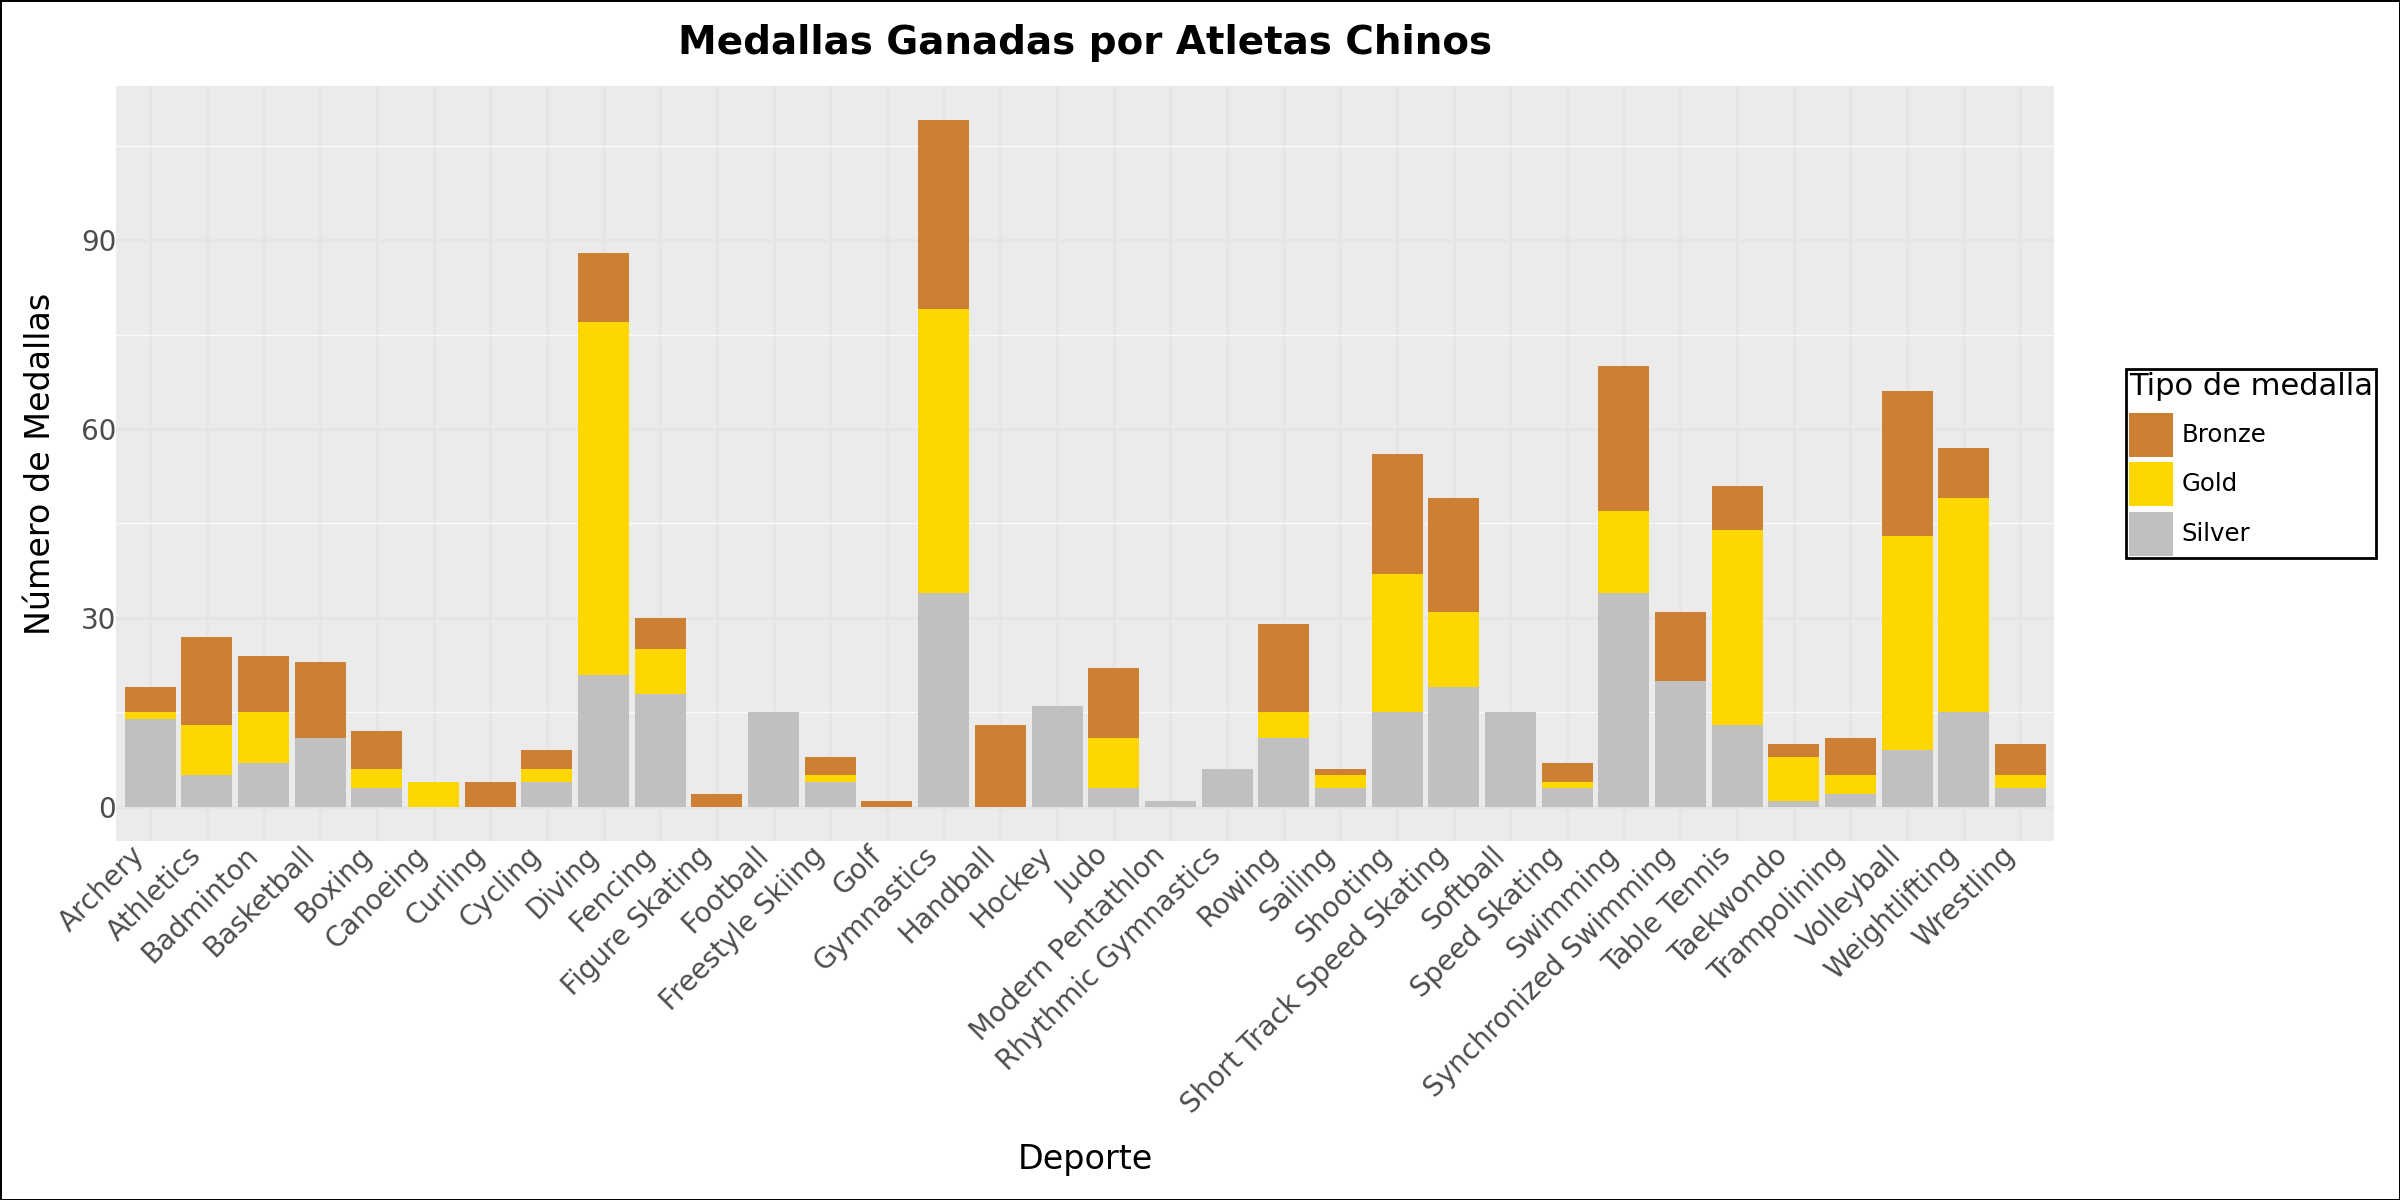

In [38]:
import pandas as pd
from plotnine import ggplot, geom_bar, geom_point, geom_line, geom_text, labs, theme_minimal, theme, element_text, aes, scale_fill_manual, element_rect, scale_x_continuous

# Cargar el archivo CSV # Cambia esta ruta si el archivo está en otro lugar
df = pd.read_csv('olympic/athlete_events.csv')

# Filtrar datos para los atletas chinos con medallas
df_china_medals = df[(df['Team'] == 'China') & (df['Medal'].notna())]

# Agrupar por deporte y contar las medallas
medallas_por_deporte = df_china_medals.groupby('Sport').size().reset_index(name='Medallas')

medal_order = pd.CategoricalDtype(categories=['Gold', 'Silver', 'Bronze'])


# Agrupar por deporte y tipo de medalla, y contar las medallas
medallas_por_tipo = (
    df_china_medals.groupby(['Sport', 'Medal'])
    .size()
    .reset_index(name='Medallas')
)

# Crear un gráfico de barras
grafico = (
    ggplot(medallas_por_tipo, aes(x='Sport', y='Medallas', fill='Medal')) +
    geom_bar(stat="identity", position="stack") +
    scale_fill_manual(
        values={
            'Gold': '#FFD700',  # Oro (amarillo dorado)
            'Silver': '#C0C0C0',  # Plata (gris plateado)
            'Bronze': '#CD7F32'  # Bronce (marrón cobrizo)
        }
    ) +
    labs(title="Medallas Ganadas por Atletas Chinos", x="Deporte", y="Número de Medallas", fill="Tipo de medalla") +
    theme_minimal() +
    theme(
        figure_size=(12, 6),  # Ajustar el tamaño de la figura (ancho, alto)
        axis_text_x=element_text(angle=45, hjust=1, size=10, margin={'t': 10}),  # Cambiar el tamaño del texto del eje x
        axis_text_y=element_text(size=10, margin={'r': 10}),  # Cambiar el tamaño del texto del eje y
        axis_title=element_text(size=12),  # Cambiar el tamaño de las etiquetas de los ejes
        plot_title=element_text(size=14, weight='bold'),  # Cambiar el tamaño y estilo del título
        panel_background=element_rect(fill="#EBEBEB"),  # Fondo del panel en blanco
        plot_background=element_rect(fill="white"),   # Fondo general en blanco
        legend_background=element_rect(fill="white")  # Fondo de la leyenda en blanco
    )
)

# Mostrar el gráfico
grafico.show()


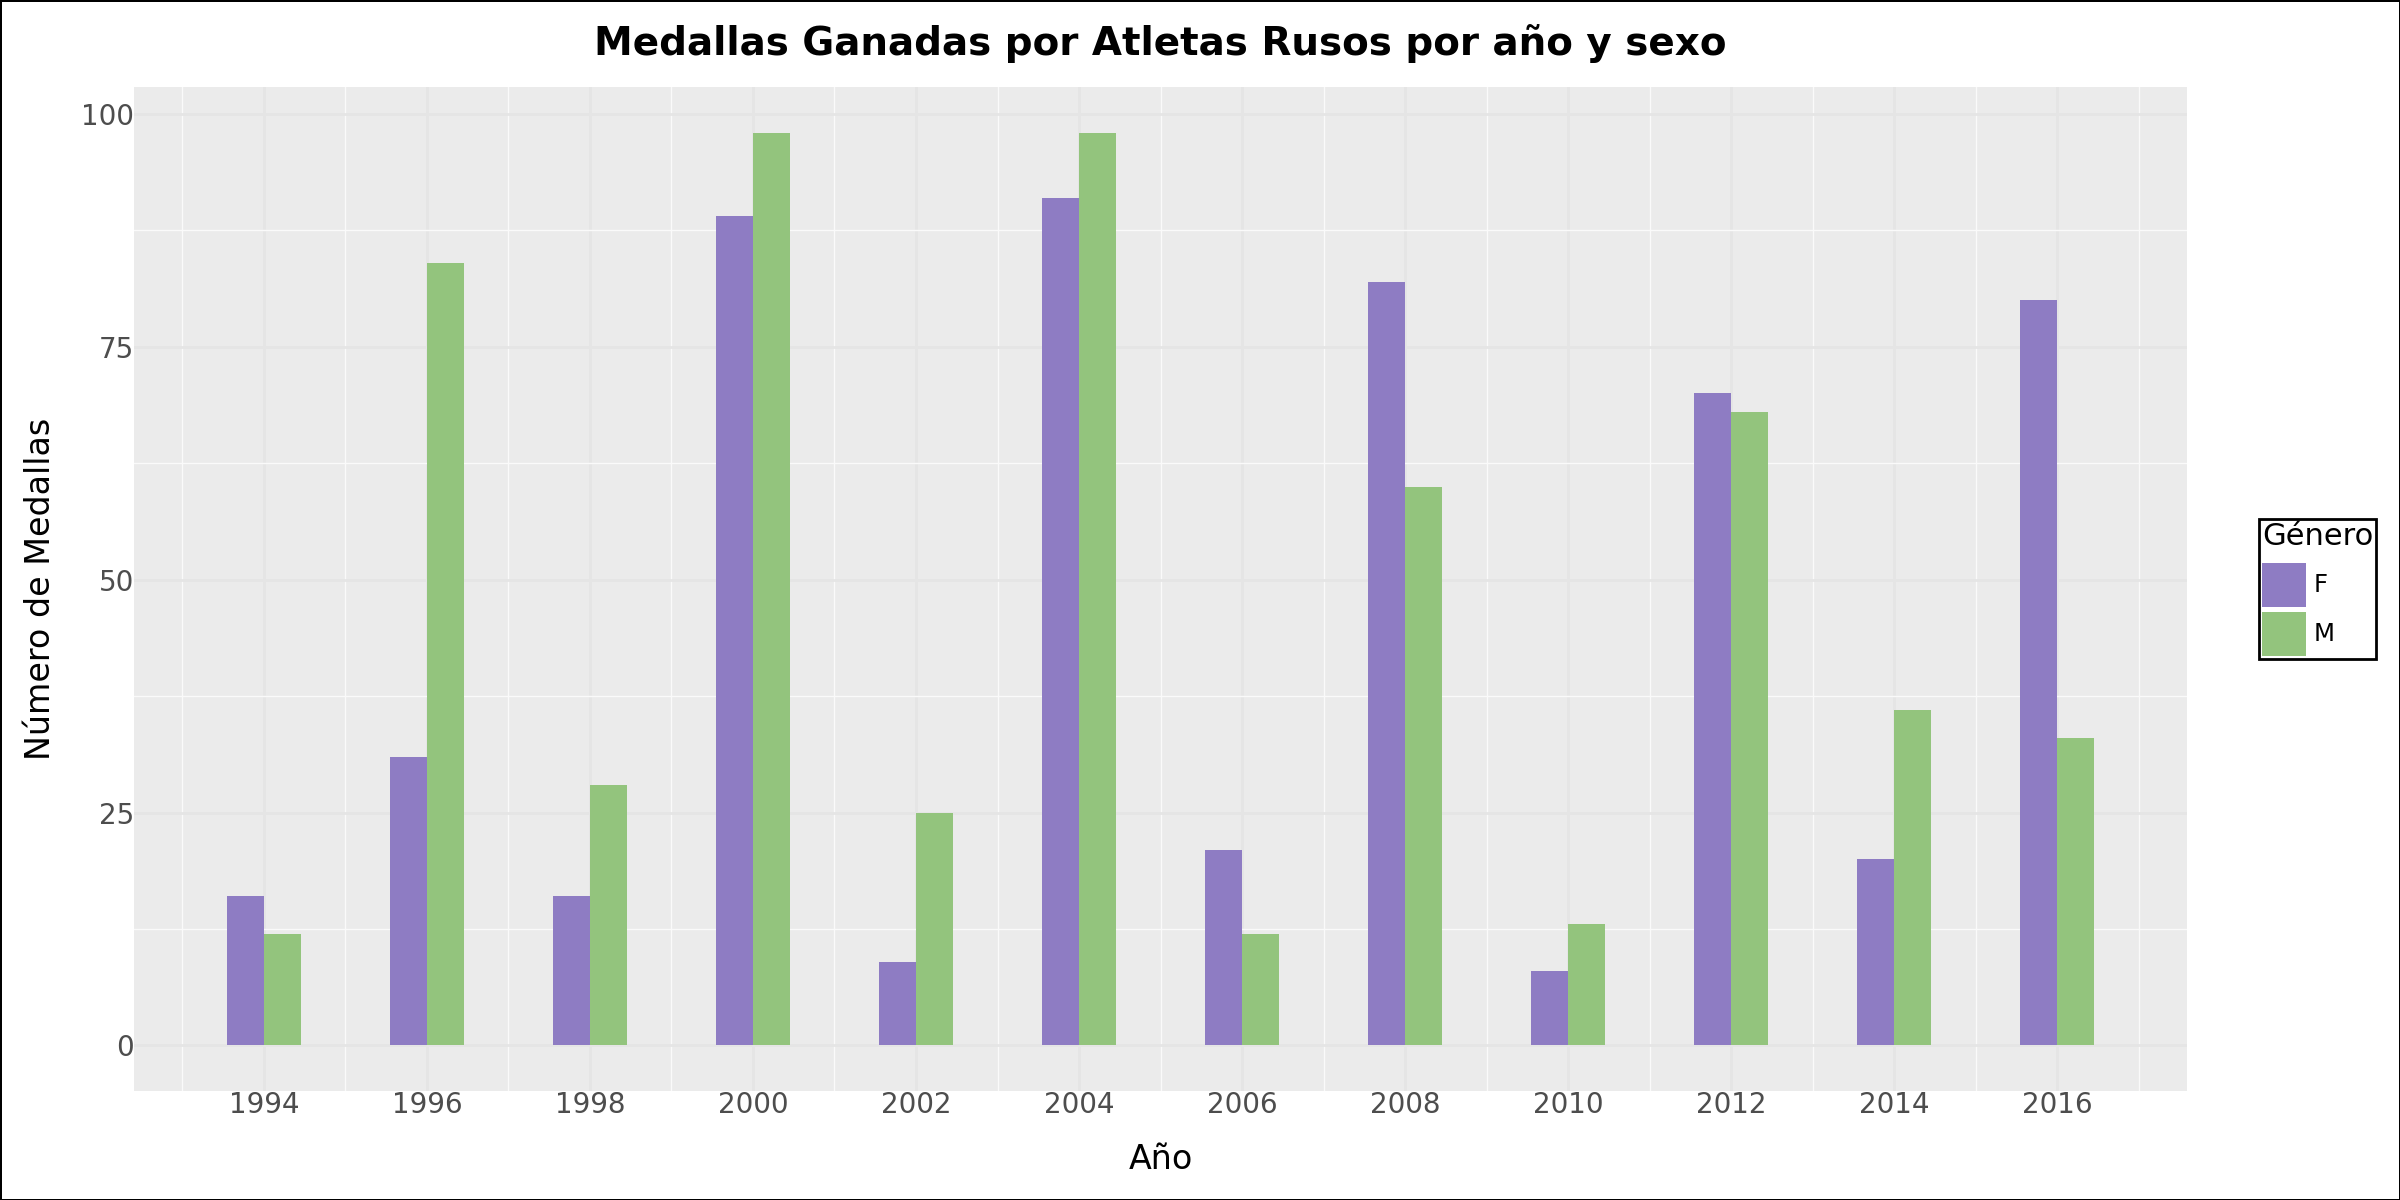

In [29]:
df = pd.read_csv('olympic/athlete_events.csv')

df_russia_medals = df[(df['Team'] == 'Russia') & (df['Medal'].notna()) & (df['Year'] >= 1994)]

medallas_anyo_sexo = (
    df_russia_medals.groupby(['Year', 'Sex'])
    .size()
    .reset_index(name='Medallas')
)

grafico = (
    ggplot(medallas_anyo_sexo, aes(x='Year', y='Medallas', fill="Sex")) +
    geom_bar(stat="identity", position="dodge") +
    scale_fill_manual(
        values={
            'F': '#8E7CC3',
            'M': '#93C47D',
        }
    ) +
    scale_x_continuous(breaks=medallas_anyo_sexo['Year'].unique()) +
    labs(title="Medallas Ganadas por Atletas Rusos por año y sexo", x="Año", y="Número de Medallas", fill="Género") +
    theme_minimal() +
    theme(
        figure_size=(12, 6),
        axis_text_x=element_text(size=10, ),
        axis_text_y=element_text(size=10, margin={'r': 8}),
        axis_title=element_text(size=12),
        plot_title=element_text(size=14, weight='bold'),
        panel_background=element_rect(fill="#EBEBEB"),
        plot_background=element_rect(fill="white"),
        legend_background=element_rect(fill="white")
    )
)

grafico.show()

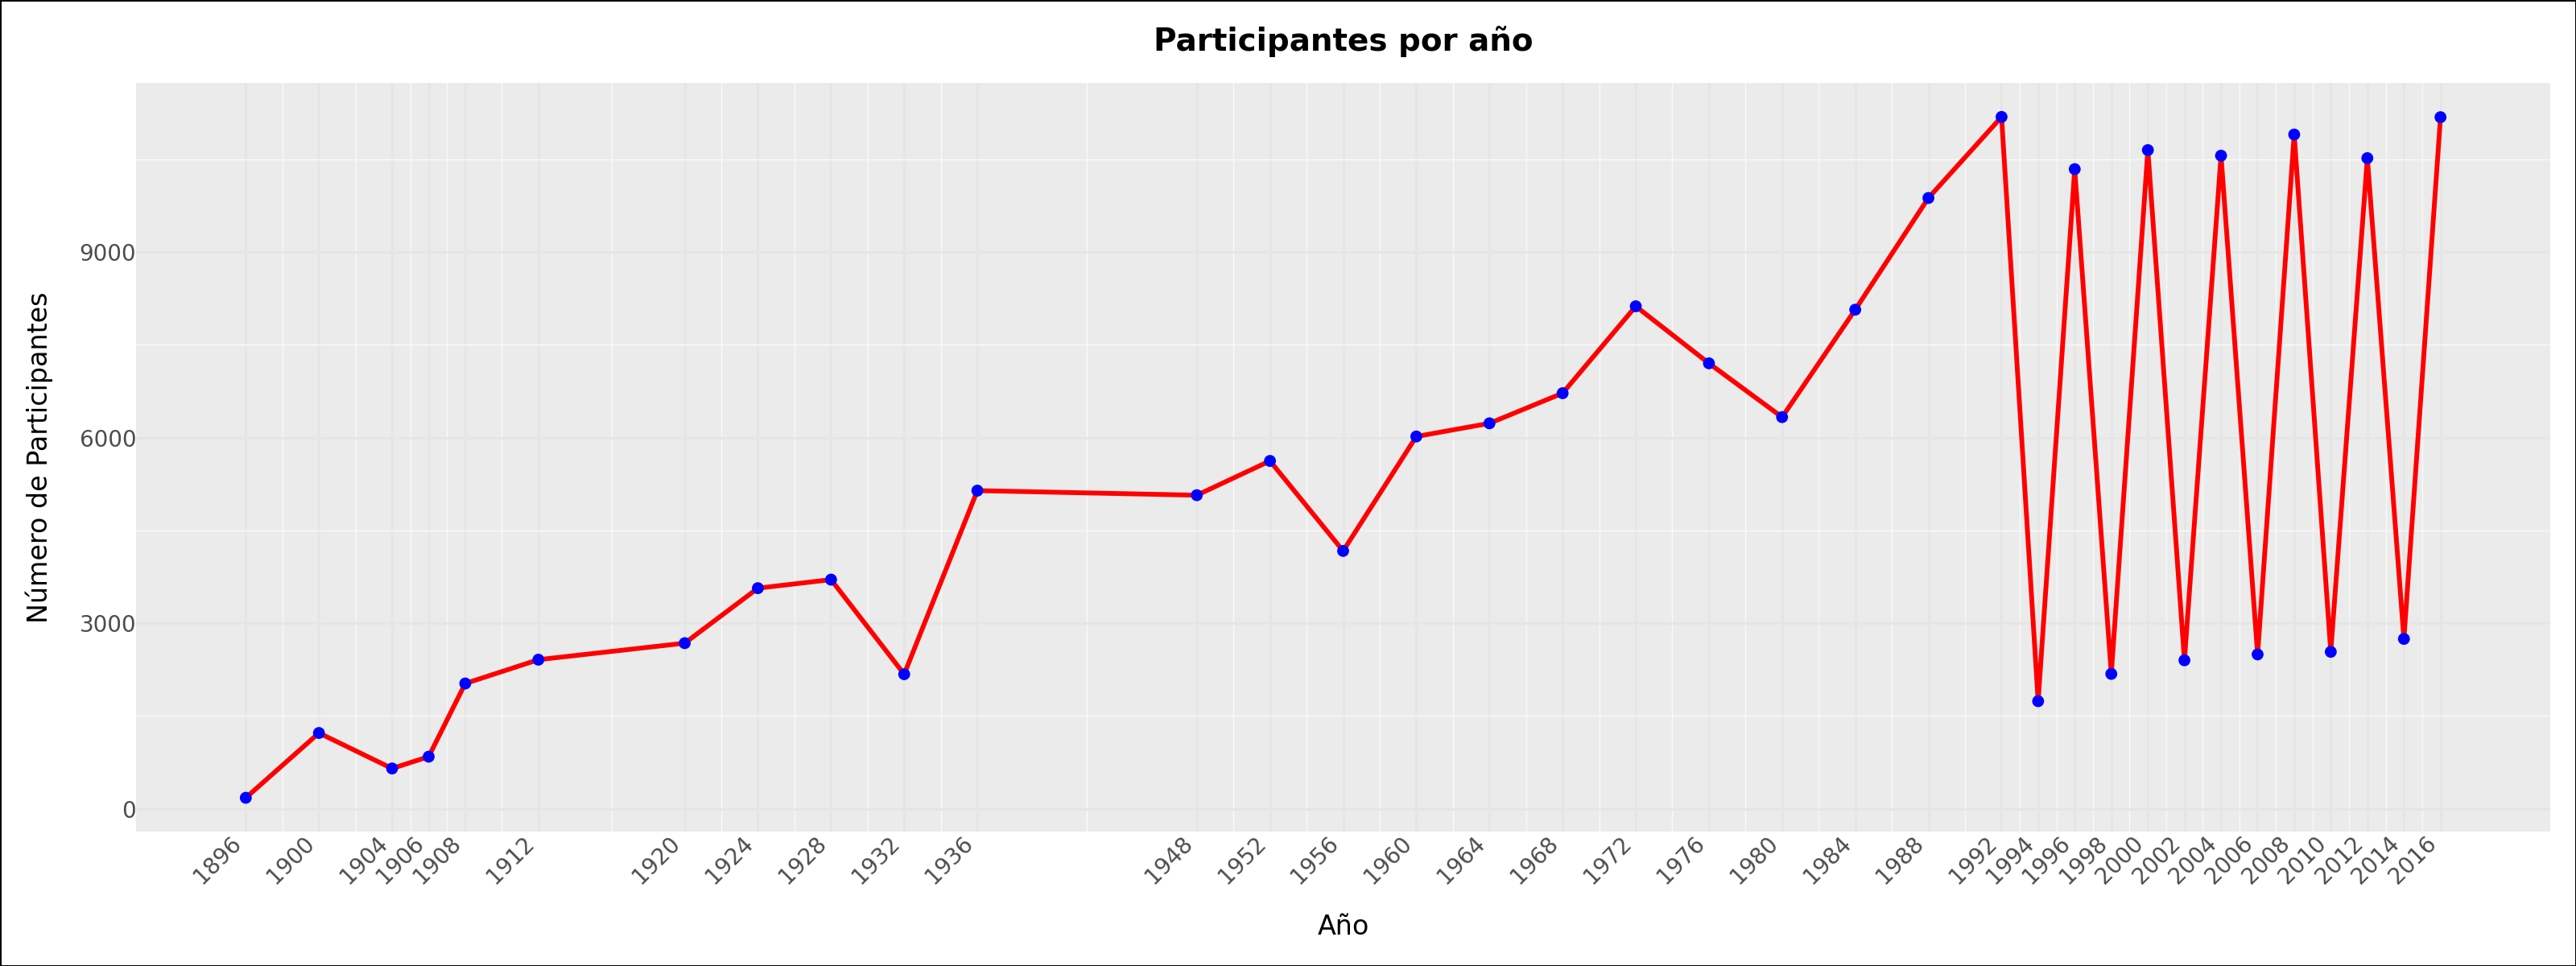

In [ ]:
df = pd.read_csv('olympic/athlete_events.csv')

participacion_anyo = (
    df.groupby('Year')['ID']
    .nunique()
    .reset_index(name='Participantes')
)

grafico = (
    ggplot(participacion_anyo, aes(x='Year', y='Participantes')) +
    geom_line(color='red', size=1.2) +
    geom_point(color='blue', size=2) +
    # geom_text(stat) +
    scale_x_continuous(breaks=participacion_anyo['Year'].unique()) +
    labs(title="Participantes por año", x="Año", y="Número de Participantes") +
    theme_minimal() +
    theme(
        figure_size=(16, 6),
        axis_text_x=element_text(angle=45, hjust=1, size=10),
        axis_text_y=element_text(size=10, margin={'r': 8}),
        axis_title=element_text(size=12),
        plot_title=element_text(size=14, weight='bold'),
        panel_background=element_rect(fill="#EBEBEB"),
        plot_background=element_rect(fill="white"),
        legend_background=element_rect(fill="white")
    )
)

grafico.show()